In [1]:
price_str = '30.14, 29.58, 26.36, 32.56, 32.82'
type(price_str)


In [2]:
id(price_str)

140528761807160

In [3]:
print('旧的price_str id = {}'.format(id(price_str)))
price_str = price_str.replace(' ', '')
print('新的price_str id = {}'.format(id(price_str)))
price_str

旧的price_str id = 140528761807160
新的price_str id = 140529023493984


'30.14,29.58,26.36,32.56,32.82'

In [4]:
price_array = price_str.split(',')
print(price_array)
price_array.append('32.82')
print(price_array)
set(price_array)
price_array.remove('32.82')
price_array

['30.14', '29.58', '26.36', '32.56', '32.82']
['30.14', '29.58', '26.36', '32.56', '32.82', '32.82']


['30.14', '29.58', '26.36', '32.56', '32.82']

In [5]:
date_array = []
date_base = 20170118
for _ in range(0, len(price_array)):
    date_array.append(str(date_base))
    date_base += 1
date_array

['20170118', '20170119', '20170120', '20170121', '20170122']

In [6]:
date_base = 20170118
date_array = [str(date_base + ind) for ind, _ in enumerate(price_array)]
date_array

['20170118', '20170119', '20170120', '20170121', '20170122']

In [7]:
date_array = []
date_base = 20170118
price_cnt = len(price_array)
while price_cnt > 0:
    date_array.append(str(date_base))
    date_base += 1
    price_cnt -= 1
date_array

['20170118', '20170119', '20170120', '20170121', '20170122']

In [8]:
stock_tuple_list = [(date, price) for date, price in zip(date_array, price_array)]

In [9]:
stock_tuple_list = [(date, price) for date, price in zip(date_array, price_array)]
print('20170119日价格: {}'.format(stock_tuple_list[1][1]))
stock_tuple_list

20170119日价格: 29.58


[('20170118', '30.14'),
 ('20170119', '29.58'),
 ('20170120', '26.36'),
 ('20170121', '32.56'),
 ('20170122', '32.82')]

In [10]:
from collections import namedtuple
stock_namedtuple = namedtuple('stock', ('date', 'price'))
stock_namedtuple_list = [stock_namedtuple(date, price) for date, price in zip(date_array, price_array)]
print('20170119日价格: {}'.format(stock_namedtuple_list[1].price))
stock_namedtuple_list

20170119日价格: 29.58


[stock(date='20170118', price='30.14'),
 stock(date='20170119', price='29.58'),
 stock(date='20170120', price='26.36'),
 stock(date='20170121', price='32.56'),
 stock(date='20170122', price='32.82')]

In [11]:
stock_dict = {date: price for date, price in zip(date_array, price_array)}
print('20170119日价格: {}'.format(stock_dict['20170119']))
stock_dict

20170119日价格: 29.58


{'20170118': '30.14',
 '20170119': '29.58',
 '20170120': '26.36',
 '20170121': '32.56',
 '20170122': '32.82'}

In [12]:
stock_dict.keys(), stock_dict.values()

(dict_keys(['20170118', '20170119', '20170120', '20170121', '20170122']),
 dict_values(['30.14', '29.58', '26.36', '32.56', '32.82']))

In [13]:
from collections import OrderedDict
stock_dict = OrderedDict((date, price) for date, price in zip(date_array, price_array))
stock_dict.keys()

odict_keys(['20170118', '20170119', '20170120', '20170121', '20170122'])

In [14]:
stock_dict

OrderedDict([('20170118', '30.14'),
             ('20170119', '29.58'),
             ('20170120', '26.36'),
             ('20170121', '32.56'),
             ('20170122', '32.82')])

In [15]:
min(stock_dict)

'20170118'

In [16]:
min(zip(stock_dict.values(), stock_dict.keys()))

('26.36', '20170120')

In [17]:
def find_second_max(dict_array):
    stock_prices_sorted = sorted(zip(dict_array.values(), dict_array.keys()))
    return stock_prices_sorted[-2]

In [18]:
if callable(find_second_max):
    print(find_second_max(stock_dict))

('32.56', '20170121')


In [19]:
find_second_max_lambda = lambda dict_array: sorted(zip(dict_array.values(), dict_array.keys()))[-2]

In [20]:
find_second_max_lambda(stock_dict)

('32.56', '20170121')

In [21]:
def find_max_and_min(dict_array):
    stock_prices_sorted = sorted(zip(dict_array.values(), dict_array.keys()))
    return stock_prices_sorted[0], stock_prices_sorted[-1]

In [22]:
find_max_and_min(stock_dict)

(('26.36', '20170120'), ('32.82', '20170122'))

In [23]:
price_float_array = [float(price_str) for price_str in stock_dict.values()]
pp_array = [(price1, price2) for price1, price2 in zip(price_float_array[:-1], price_float_array[1:])]
pp_array

[(30.14, 29.58), (29.58, 26.36), (26.36, 32.56), (32.56, 32.82)]

In [24]:
from functools import reduce
change_array = list(map(lambda pp: reduce(lambda a, b: round((b - a) / a, 3), pp), pp_array))
change_array.insert(0, 0)
change_array

[0, -0.019, -0.109, 0.235, 0.008]

In [25]:
stock_namedtuple = namedtuple('stock', ('date', 'price', 'change'))
stock_dict = OrderedDict((date, stock_namedtuple(date, price, change)) for date, price, change in zip(date_array, price_array, change_array))
stock_dict

OrderedDict([('20170118', stock(date='20170118', price='30.14', change=0)),
             ('20170119',
              stock(date='20170119', price='29.58', change=-0.019)),
             ('20170120',
              stock(date='20170120', price='26.36', change=-0.109)),
             ('20170121', stock(date='20170121', price='32.56', change=0.235)),
             ('20170122',
              stock(date='20170122', price='32.82', change=0.008))])

In [26]:
up_days = list(filter(lambda day: day.change > 0, stock_dict.values()))
up_days

[stock(date='20170121', price='32.56', change=0.235),
 stock(date='20170122', price='32.82', change=0.008)]

In [27]:
def filter_stock(stock_array_dict, want_up = True, want_calc_sum = False):
    if not isinstance(stock_array_dict, OrderedDict):
        raise TypeError('stock_array_dict must be OrderedDict!')
    filter_func = (lambda day: day.change > 0) if want_up else (lambda day: day.change < 0)
    want_days = list(filter(filter_func, stock_array_dict.values()))
    if not want_calc_sum:
        return want_days
    change_sum = 0.0
    for day in want_days:
        change_sum += day.change
    return change_sum

In [28]:
print('所有上涨的交易日: {}'.format(filter_stock(stock_dict)))
print('所有下跌的交易日: {}'.format(filter_stock(stock_dict, want_up = False)))
print('所有上涨交易日的涨幅和: {}'.format(filter_stock(stock_dict, want_calc_sum = True)))
print('所有下跌交易日的涨幅和: {}'.format(filter_stock(stock_dict, want_up = False, want_calc_sum = True)))

所有上涨的交易日: [stock(date='20170121', price='32.56', change=0.235), stock(date='20170122', price='32.82', change=0.008)]
所有下跌的交易日: [stock(date='20170119', price='29.58', change=-0.019), stock(date='20170120', price='26.36', change=-0.109)]
所有上涨交易日的涨幅和: 0.243
所有下跌交易日的涨幅和: -0.128


In [29]:
from functools import partial
filter_stock_up_days = partial(filter_stock, want_up = True, want_calc_sum = False)
filter_stock_down_days = partial(filter_stock, want_up = False, want_calc_sum = False)
filter_stock_up_sums = partial(filter_stock, want_up = True, want_calc_sum = True)
filter_stock_down_sums = partial(filter_stock, want_up = False, want_calc_sum = True)

In [30]:
print('所有上涨的交易日: {}'.format(filter_stock_up_days(stock_dict)))
print('所有下跌的交易日: {}'.format(filter_stock_down_days(stock_dict)))
print('所有上涨交易日的涨幅和: {}'.format(filter_stock_up_sums(stock_dict)))
print('所有下跌交易日的涨幅和: {}'.format(filter_stock_down_sums(stock_dict)))

所有上涨的交易日: [stock(date='20170121', price='32.56', change=0.235), stock(date='20170122', price='32.82', change=0.008)]
所有下跌的交易日: [stock(date='20170119', price='29.58', change=-0.019), stock(date='20170120', price='26.36', change=-0.109)]
所有上涨交易日的涨幅和: 0.243
所有下跌交易日的涨幅和: -0.128


In [31]:
from collections import namedtuple
from collections import OrderedDict
from functools import reduce
class StockTradeDays(object):
    def __init__(self, price_array, start_date, date_array = None):
        self.__price_array = price_array
        self.__date_array = self._init_days(start_date, date_array)
        self.__change_array = self.__init_change()
        self.stock_dict = self._init_stock_dict()
    def __init_change(self):
        price_float_array = [float(price_str) for price_str in self.__price_array]
        pp_array = [(price1, price2) for price1, price2 in zip(price_float_array[:-1], price_float_array[1:])]
        change_array = list(map(lambda pp: reduce(lambda a, b: round((b - a) / a, 3), pp), pp_array))
        change_array.insert(0, 0)
        return change_array
    def _init_days(self, start_date, date_array):
        if date_array is None:
            date_array = [str(start_date + ind) for ind, _ in enumerate(self.__price_array)]
        else:
            date_array = [str(date) for date in date_array]
        return date_array
    def _init_stock_dict(self):
        stock_namedtuple = namedtuple('stock', ('date', 'price', 'change'))
        stock_dict = OrderedDict((date, stock_namedtuple(date, price, change)) for date, price, change in zip(self.__date_array, self.__price_array, self.__change_array))
        return stock_dict
    def filter_stock(self, want_up = True, want_calc_sum = False):
        filter_func = (lambda day: day.change > 0) if want_up else (lambda day: day.change < 0)
        want_days = list(filter(filter_func, self.stock_dict.values()))
        if not want_calc_sum:
            return want_days
        change_sum = 0.0
        for day in want_days:
            change_sum += day.change
        return change_sum
    def __str__(self):
        return str(self.stock_dict)
    __repr__ = __str__
    def __iter__(self):
        for key in self.stock_dict:
            yield self.stock_dict[key]
    def __getitem__(self, ind):
        date_key = self.__date_array[ind]
        return self.stock_dict[date_key]
    def __len__(self):
        return len(self.stock_dict)

In [32]:
price_array = '30.14,29.58,26.36,32.56,32.82'.split(',')
date_base = 20170118
trade_days = StockTradeDays(price_array, date_base)
trade_days

OrderedDict([('20170118', stock(date='20170118', price='30.14', change=0)), ('20170119', stock(date='20170119', price='29.58', change=-0.019)), ('20170120', stock(date='20170120', price='26.36', change=-0.109)), ('20170121', stock(date='20170121', price='32.56', change=0.235)), ('20170122', stock(date='20170122', price='32.82', change=0.008))])

In [33]:
print('trade_days对象长度为: {}'.format(len(trade_days)))

trade_days对象长度为: 5


In [34]:
from collections import Iterable
if isinstance(trade_days, Iterable):
    for day in trade_days:
        print(day)

stock(date='20170118', price='30.14', change=0)
stock(date='20170119', price='29.58', change=-0.019)
stock(date='20170120', price='26.36', change=-0.109)
stock(date='20170121', price='32.56', change=0.235)
stock(date='20170122', price='32.82', change=0.008)


In [35]:
trade_days.filter_stock()

[stock(date='20170121', price='32.56', change=0.235),
 stock(date='20170122', price='32.82', change=0.008)]

In [36]:
from abupy import ABuSymbolPd
price_array = ABuSymbolPd.make_kl_df('TSLA', n_folds = 2).close.tolist()
date_array = ABuSymbolPd.make_kl_df('TSLA', n_folds = 2).date.tolist()
price_array[:5], date_array[:5]

([261.92, 250.68, 255.01, 254.78, 263.16],
 [20170320, 20170321, 20170322, 20170323, 20170324])

In [37]:
trade_days = StockTradeDays(price_array, date_base, date_array)
print('trade_days对象长度为: {}'.format(len(trade_days)))
print('最后一天交易数据为: {}'.format(trade_days[-1]))

trade_days对象长度为: 450
最后一天交易数据为: stock(date='20181231', price=326.09, change=0.0)


In [38]:
import six
from abc import ABCMeta, abstractmethod
class TradeStrategyBase(six.with_metaclass(ABCMeta, object)):
    @abstractmethod
    def buy_strategy(self, *args, **kwargs):
        pass
    def sell_strategy(self, *args, **kwargs):
        pass

In [39]:
class TradeStrategy1(TradeStrategyBase):
    s_keep_stock_threshold = 20
    def __init__(self):
        self.keep_stock_day = 0
        self.__buy_change_threshold = 0.07
    def buy_strategy(self, trade_ind, trade_day, thrde_days):
        if self.keep_stock_day == 0 and trade_day.change > self.__buy_change_threshold:
            self.keep_stock_day += 1
        elif self.keep_stock_day > 0:
            self.keep_stock_day += 1
    def sell_strategy(self, trade_int, trade_day, trade_days):
        if self.keep_stock_day >= TradeStrategy1.s_keep_stock_threshold:
            self.keep_stock_day = 0
    @property
    def buy_change_threshold(self):
        return self.__buy_change_threshold
    @buy_change_threshold.setter
    def buy_change_threshold(self, buy_change_threshold):
        if not isinstance(buy_change_threshold, float):
            raise TypeError('buy_change_threshold must be float!')
        self.__buy_change_threshold = round(buy_change_threshold, 2)

In [40]:
class TradeLoopBack(object):
    def __init__(self, trade_days, trade_strategy):
        self.trade_days = trade_days
        self.trade_strategy = trade_strategy
        self.profit_array = []
    def execute_trade(self):
        for ind, day in enumerate(self.trade_days):
            if self.trade_strategy.keep_stock_day > 0:
                self.profit_array.append(day.change)
            if hasattr(self.trade_strategy, 'buy_strategy'):
                self.trade_strategy.buy_strategy(ind, day, self.trade_days)
            if hasattr(self.trade_strategy, 'sell_strategy'):
                self.trade_strategy.sell_strategy(ind, day, self.trade_days)

In [41]:
trade_loop_back = TradeLoopBack(trade_days, TradeStrategy1())
trade_loop_back.execute_trade()
print('回测策略1 总盈亏为: {}%'.format(reduce(lambda a, b: a + b, trade_loop_back.profit_array) * 100))

回测策略1 总盈亏为: 14.900000000000007%


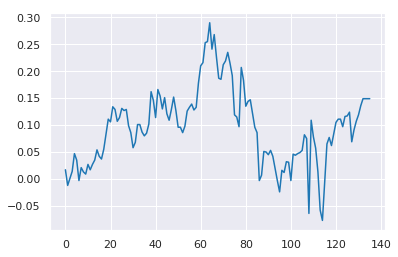

In [42]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.array(trade_loop_back.profit_array).cumsum())

In [43]:
trade_strategy1 = TradeStrategy1()
trade_strategy1.buy_change_threshold

0.07

In [44]:
trade_strategy1.buy_change_threshold = 0.08
trade_strategy1.buy_change_threshold

0.08

回测策略1 总盈亏为: -3.700000000000002%


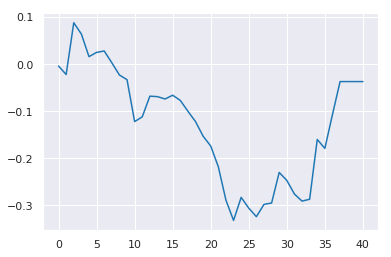

In [45]:
trade_strategy1 = TradeStrategy1()
trade_strategy1.buy_change_threshold = 0.1
trade_loop_back = TradeLoopBack(trade_days, trade_strategy1)
trade_loop_back.execute_trade()
print('回测策略1 总盈亏为: {}%'.format(reduce(lambda a, b: a + b, trade_loop_back.profit_array) * 100))
plt.plot(np.array(trade_loop_back.profit_array).cumsum())

In [46]:
class TradeStrategy2(TradeStrategyBase):
    s_keep_stock_threshold = 10
    s_buy_change_threshold = -0.10
    def __init__(self):
        self.keep_stock_day = 0
    def buy_strategy(self, trade_ind, trade_day, trade_days):
        if self.keep_stock_day == 0 and trade_ind >= 1:
            today_down = trade_day.change < 0
            yesterday_down = trade_days[trade_ind - 1].change < 0
            down_rate = trade_day.change + trade_days[trade_ind - 1].change
            if today_down and yesterday_down and down_rate < TradeStrategy2.s_buy_change_threshold:
                self.keep_stock_day += 1
        elif self.keep_stock_day > 0:
            self.keep_stock_day += 1
    def sell_strategy(self, trade_ind, trade_day, trade_days):
        if self.keep_stock_day >= TradeStrategy2.s_keep_stock_threshold:
            self.keep_stock_day = 0
    @classmethod
    def set_keep_stock_threshold(cls, keep_stock_threshold):
        cls.s_keep_stock_threshold = keep_stock_threshold
    @staticmethod
    def set_buy_change_threshold(buy_change_threshold):
        TradeStrategy2.s_buy_change_threshold = buy_change_threshold

回测策略2 总盈亏为: 31.799999999999983%


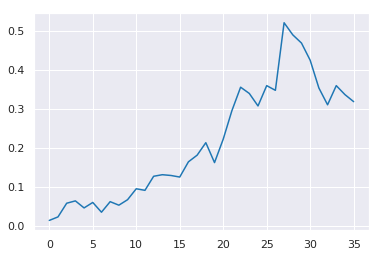

In [47]:
trade_strategy2 = TradeStrategy2()
trade_loop_back = TradeLoopBack(trade_days, trade_strategy2)
trade_loop_back.execute_trade()
print('回测策略2 总盈亏为: {}%'.format(reduce(lambda a, b: a + b, trade_loop_back.profit_array) * 100))
plt.plot(np.array(trade_loop_back.profit_array).cumsum())

回测策略2 总盈亏为:27.799999999999997%


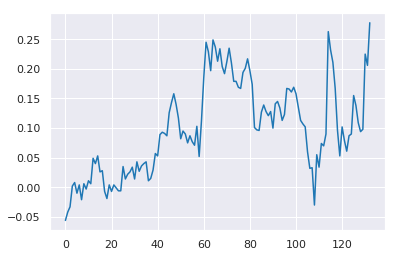

In [48]:
trade_strategy2 = TradeStrategy2()
TradeStrategy2.set_keep_stock_threshold(20)
TradeStrategy2.set_buy_change_threshold(-0.08)
trade_loop_back = TradeLoopBack(trade_days, trade_strategy2)
trade_loop_back.execute_trade()
print('回测策略2 总盈亏为:{}%'.format(reduce(lambda a, b: a + b, trade_loop_back.profit_array) * 100))
plt.plot(np.array(trade_loop_back.profit_array).cumsum())

In [49]:
import itertools
items = [1, 2, 3]
for item in itertools.permutations(items):
    print(item)

(1, 2, 3)
(1, 3, 2)
(2, 1, 3)
(2, 3, 1)
(3, 1, 2)
(3, 2, 1)


In [50]:
for item in itertools.combinations(items, 2):
    print(item)

(1, 2)
(1, 3)
(2, 3)


In [51]:
for item in itertools.combinations_with_replacement(items, 2):
    print(item)

(1, 1)
(1, 2)
(1, 3)
(2, 2)
(2, 3)
(3, 3)


In [52]:
ab = ['a', 'b']
cd = ['c', 'd']
for item in itertools.product(ab, cd):
    print(item)

('a', 'c')
('a', 'd')
('b', 'c')
('b', 'd')


In [53]:
def calc(keep_stock_threshold, buy_change_threshold):
    trade_strategy2 = TradeStrategy2()
    TradeStrategy2.set_keep_stock_threshold(keep_stock_threshold)
    TradeStrategy2.set_buy_change_threshold(buy_change_threshold)
    trade_loop_back = TradeLoopBack(trade_days, trade_strategy2)
    trade_loop_back.execute_trade()
    profit = 0.0 if len(trade_loop_back.profit_array) == 0 else reduce(lambda a, b: a + b, trade_loop_back.profit_array)
    return profit, keep_stock_threshold, buy_change_threshold
calc(20, -0.08)

(0.27799999999999997, 20, -0.08)

In [54]:
keep_stock_list = list(range(2, 30, 2))
print('持股天数参数组: {}'.format(keep_stock_list))
buy_change_list = [buy_change / 100.0 for buy_change in range(-5, -16, -1)]
print('下跌阈值参数组: {}'.format(buy_change_list))

持股天数参数组: [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28]
下跌阈值参数组: [-0.05, -0.06, -0.07, -0.08, -0.09, -0.1, -0.11, -0.12, -0.13, -0.14, -0.15]


In [55]:
result = []
for keep_stock_threshold, buy_change_threshold in itertools.product(keep_stock_list, buy_change_list):
    result.append(calc(keep_stock_threshold, buy_change_threshold))
print('笛卡尔集参数集合总共结果为: {}个'.format(len(result)))

笛卡尔集参数集合总共结果为: 154个


In [56]:
sorted(result)[::-1][:10]

[(0.9319999999999997, 28, -0.09),
 (0.8909999999999996, 28, -0.05),
 (0.7889999999999997, 26, -0.09),
 (0.7229999999999998, 24, -0.09),
 (0.6839999999999999, 28, -0.1),
 (0.6769999999999998, 28, -0.08),
 (0.6759999999999999, 22, -0.09),
 (0.6619999999999999, 22, -0.1),
 (0.6579999999999998, 24, -0.1),
 (0.647, 28, -0.07)]

In [57]:
from concurrent.futures import ProcessPoolExecutor
import time
result = []
def when_done(r):
    result.append(r.result())
with ProcessPoolExecutor() as pool:
    for keep_stock_threshold, buy_change_threshold in itertools.product(keep_stock_list, buy_change_list):
        future_result = pool.submit(calc, keep_stock_threshold, buy_change_threshold)
        future_result.add_done_callback(when_done)

In [58]:
sorted(result)[::-1][:10]

[(0.9319999999999997, 28, -0.09),
 (0.8909999999999996, 28, -0.05),
 (0.7889999999999997, 26, -0.09),
 (0.7229999999999998, 24, -0.09),
 (0.6839999999999999, 28, -0.1),
 (0.6769999999999998, 28, -0.08),
 (0.6759999999999999, 22, -0.09),
 (0.6619999999999999, 22, -0.1),
 (0.6579999999999998, 24, -0.1),
 (0.647, 28, -0.07)]

In [59]:
from concurrent.futures import ThreadPoolExecutor
result = []
def when_done(r):
    result.append(r.result())
with ThreadPoolExecutor() as pool:
    for keep_stock_threshold, buy_change_threshold in itertools.product(keep_stock_list, buy_change_list):
        future_result = pool.submit(calc, keep_stock_threshold, buy_change_threshold)
        future_result.add_done_callback(when_done)

In [60]:
sorted(result)[::-1][:10]

[(0.9319999999999997, 28, -0.09),
 (0.8909999999999996, 28, -0.05),
 (0.7889999999999997, 26, -0.09),
 (0.7229999999999998, 24, -0.09),
 (0.6839999999999999, 16, -0.07),
 (0.6769999999999998, 28, -0.08),
 (0.6759999999999999, 22, -0.09),
 (0.6579999999999998, 24, -0.07),
 (0.647, 28, -0.07),
 (0.641, 28, -0.11)]

In [61]:
keep_stock_list = list(range(1, len(price_array), 1))
buy_change_list = [buy_change / 100.0 for buy_change in range(-1, -100, -1)]
def do_single_task():
    task_list = list(itertools.product(keep_stock_list, buy_change_list))
    print('笛卡尔积参数集合总共结果为: {}个'.format(len(task_list)))
    for keep_stock_threshold, buy_change_threshold in task_list:
        calc(keep_stock_threshold, buy_change_threshold)
#%time do_single_task()

In [62]:
import numba as nb
do_single_task_nb = nb.jit(do_single_task)
#%time do_single_task_nb()

In [64]:
for s in keep_stock_list + buy_change_list:
    print(s)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [68]:
from itertools import chain
for s in chain(keep_stock_list, buy_change_list):
    print(s)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [70]:
def gen_buy_change_list():
    buy_change_list = []
    for buy_change in list(range(-5, -16, -1)):
        buy_change = buy_change / 100
        buy_change_list.append(buy_change)
    return buy_change_list

In [73]:
gen_buy_change_list()

[-0.05, -0.06, -0.07, -0.08, -0.09, -0.1, -0.11, -0.12, -0.13, -0.14, -0.15]

In [74]:
def gen_buy_change_list():
    buy_change_list = []
    for buy_change in list(range(-5, -16, -1)):
        print(buy_change)
        buy_change = buy_change / 100
        print(buy_change)
        buy_change_list.append(buy_change)
    return buy_change_list

In [76]:
gen_buy_change_list()

-5
-0.05
-6
-0.06
-7
-0.07
-8
-0.08
-9
-0.09
-10
-0.1
-11
-0.11
-12
-0.12
-13
-0.13
-14
-0.14
-15
-0.15


[-0.05, -0.06, -0.07, -0.08, -0.09, -0.1, -0.11, -0.12, -0.13, -0.14, -0.15]

In [78]:
from __future__ import division
def gen_buy_change_list():
    buy_change_list = []
    for buy_change in list(range(-5, -16, -1)):
        buy_change = buy_change / 100.0
        buy_change_list.append(buy_change)
    return buy_change_list
gen_buy_change_list()

[-0.05, -0.06, -0.07, -0.08, -0.09, -0.1, -0.11, -0.12, -0.13, -0.14, -0.15]

In [97]:
import logging
logging.basicConfig(level = logging.INFO)
def gen_buy_change_list():
    logging.info("gen_buy_change_list begin")
    buy_change_list = []
    for buy_change in list(range(-5, -16, -1)):
        logging.debug(buy_change)
        buy_change = buy_change / 100
        logging.debug(buy_change)
        buy_change_list.append(buy_change)
    logging.info("gen_buy_change_list end")
    return buy_change_list
_ = gen_buy_change_list()

gen_buy_change_list begin
gen_buy_change_list end


In [100]:
import pdb
def gen_buy_change_list():
    buy_change_list = []
    for buy_change in list(range(-5, -16, -1)):
        if buy_change == -10:
            pdb.set_trace()
        buy_change = buy_change / 100
        buy_change_list.append(buy_change)
    raise RuntimeError('debug for pdb')
    return buy_change_list
try:
    _ = gen_buy_change_list()
except Exception as e:
    pdb.set_trace()

> <ipython-input-100-3942e2c2ab97>(7)gen_buy_change_list()
-> buy_change = buy_change / 100
(Pdb) c
--Return--
> <ipython-input-100-3942e2c2ab97>(14)<module>()->None
-> pdb.set_trace()
(Pdb) c


shuang
